<h2> Content List </h2>

* Question
* Answer
    * Libraries and Data Preparation
    * Answer to Point A and B
        * Descriptive Statistics
        * Histograms
        * Q-Q Plot
        * Normality Test (Parametric/Non-parametric)
        * Correlations 
        * ANOVA
    * Answer to Point C 
        * K-Means
            * Elbow Method for K-Means Model
            * Silhouette Score
        * Agglomerative Heirarchical Clustering
            * Single Linkage (Minimum)
            * Complete Linkage (Maximum)
            * Average Linkage
            * Centroid Linkage
        * Conclusion

<h2> Question </h2>

<img src="./Question1.jpg" width=640 align="left"></img>

This Analysis is made by : Billy

<h3> Libraries and Data Preparation </h3>

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from answerQ1 import *

In [2]:
# Load Data
data = pd.read_csv('./ingredient.csv')

In [3]:
data.head(n=5)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [4]:
# Data Structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


* Number of Rows (Formulations) : 214
* Number of Columns (Additives) : 9

In [5]:
# Check For Null Values
data.isnull().values.any()

False

No Null Value

<h2> Answer to Point A and B </h2>
I will answer point A and B together because they're related each other

<h3> Descriptive Statistics </h3>
First, I look for Desciptive Statistics of the Data that desribes mean,min,max,and standard deviation  

In [6]:
data.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<h3> Histograms </h3>

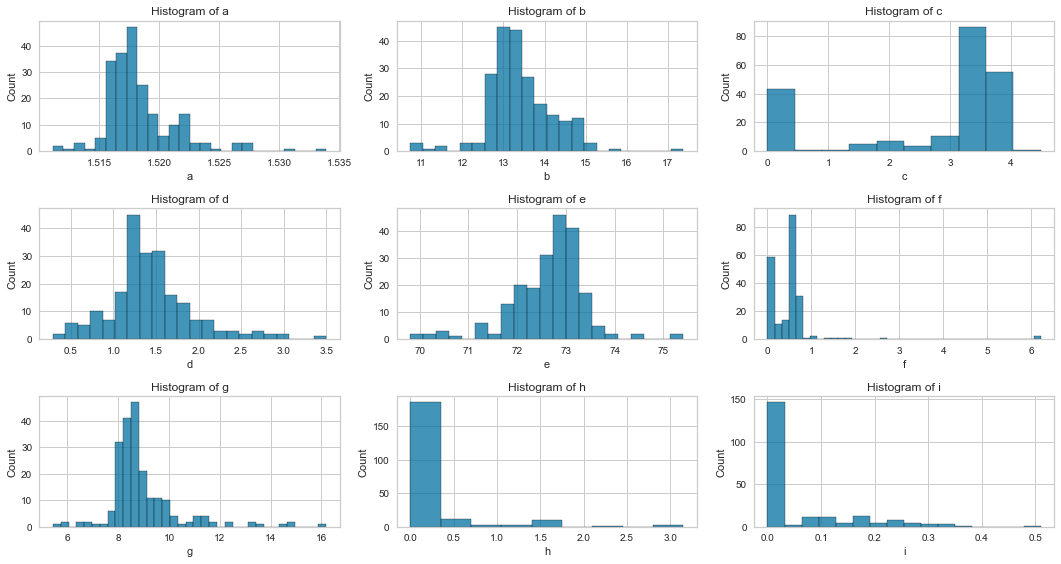

In [7]:
show_histograms(data)

In [8]:
data.skew()

a    1.625431
b    0.454181
c   -1.152559
d    0.907290
e   -0.730447
f    6.551648
g    2.047054
h    3.416425
i    1.754327
dtype: float64

<b> Findings </b> : 
* All histogram are unimodal (one peak) except for Additive "C" (multimodal/more than one peak)
* Most of hisotgram have positive skew (tail on right) [except Additive "C" and "E"]

<h3> Q-Q Plot </h3>

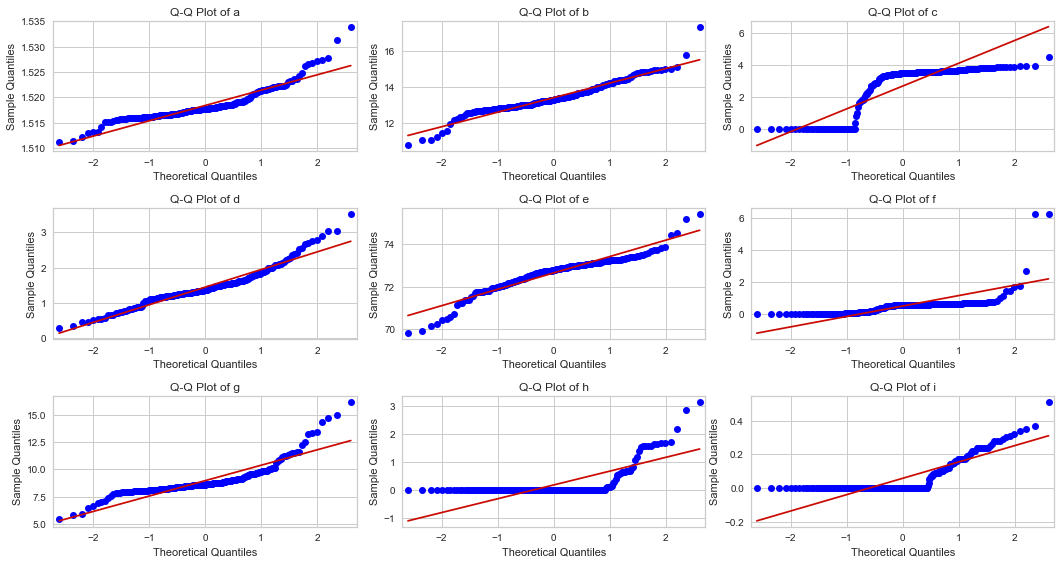

In [9]:
show_qq_plot(data)

Findings from Q-Q Plot : <br>
* Additive A, B, D, E    : Seems Parametric (Normal Distribution)
* Additive C, F, G, H, I : Seems Non-Parametric (Not Normal Distribution)

But, better to do a normality test (statistical test)

<h3> Normality Test (Parametric/Non-parametric) </h3>

In [10]:
result = show_normality_test(data)
result

,variable,shapiro_wilk_test_p_value,shapiro_wilk_test_p_result,d_agostinos_k_squared_test_p_value,d_agostinos_k_squared_test_result
0,a,1.076643e-12,Ha : Not Gaussian,4.806065e-19,Ha : Not Gaussian
1,b,3.465683e-07,Ha : Not Gaussian,1.360632e-06,Ha : Not Gaussian
2,c,2.390899e-19,Ha : Not Gaussian,1.613377e-08,Ha : Not Gaussian
3,d,2.083196e-07,Ha : Not Gaussian,1.034521e-08,Ha : Not Gaussian
4,e,2.174813e-09,Ha : Not Gaussian,1.622883e-08,Ha : Not Gaussian
5,f,2.172175e-25,Ha : Not Gaussian,4.222522e-67,Ha : Not Gaussian
6,g,4.286654e-16,Ha : Not Gaussian,1.691698e-24,Ha : Not Gaussian
7,h,5.383263e-26,Ha : Not Gaussian,3.192617e-39,Ha : Not Gaussian
8,i,1.156669e-20,Ha : Not Gaussian,2.035388e-17,Ha : Not Gaussian


Both Test (Shapiro Wilk & D'Agostino's K-squared) Reject The Null-Hypothesis which means all variables (additives) are Non-Parametric  (Not Normal Distribution) distribution

<h3> Correlations </h3>

Level of Correlation Between Variable <br>
<img src='./The-level-of-correlation-between-variables.png' width=250, align="left"></img>

In [11]:
# Correlation Matrix
result = show_correlation_matrix(data)
result

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


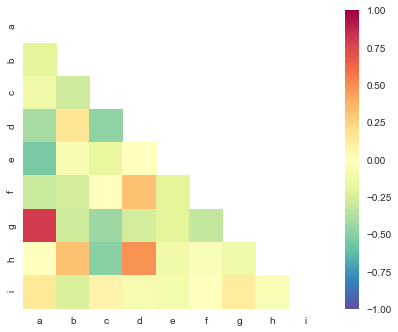

In [12]:
# Correlation Matrix Heat Map
show_correlation_matrix_heat_map(data)

In [13]:
print("Top 5 Positive Correlations")
print(get_top_pos_correlations(data, 5))

Top 5 Positive Correlations
a  g    0.810403
d  h    0.479404
b  h    0.326603
d  f    0.325958
b  d    0.156794
dtype: float64


* Additive A & G : High Positive Correlation (which means if Additive A is added, Additive B is also added)
* The Rest : Low Possitive Correlation 

<AxesSubplot:xlabel='a', ylabel='g'>

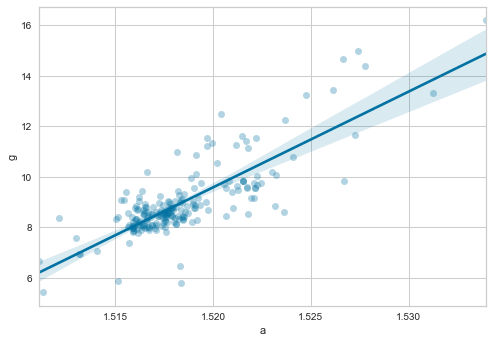

In [14]:
# Scatter Plot for Additiva "A" and "G"
sns.regplot(data=data, x="a", y="g",scatter_kws={'alpha':0.3})

This scatter plot tells that if additive A is added, additive G is also added

In [15]:
print("Top 5 Negative Correlations")
print(get_top_neg_correlations(data, 5))

Top 5 Negative Correlations
a  e   -0.542052
c  h   -0.492262
   d   -0.481799
   g   -0.443750
a  d   -0.407326
dtype: float64


* Additive A & E : Moderate Negative Correlation (which means if Additive A is added, Additive E is slightly reduced)
* The Rest : Low Negative Correlation 

<AxesSubplot:xlabel='a', ylabel='e'>

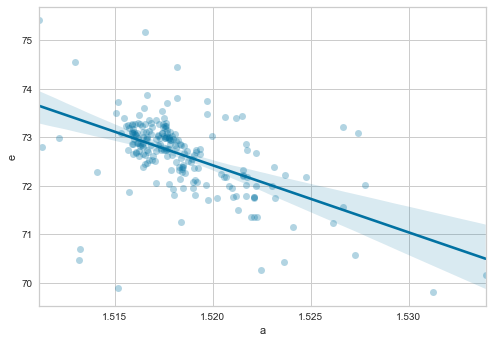

In [16]:
# Scatter Plot for Additiva "A" and "E"
sns.regplot(data=data, x="a", y="e",scatter_kws={'alpha':0.3})

We can see in this scatter plot that if additive A is added, additive E is slightly reduced

<h3> ANOVA </h3>
ANOVA is not applicable for this dataset becase all columns are numbers. We need categorical column or group.

<h2> Answer to Point C </h2>

I will use two types of Model for this clustering task : 
1. K-Means <br>
2. Agglomerative Heirarchical Clustering <br>
<br>
For K-Means model, i will use Elbow Method and Silhouette Score to determine number of cluster<br>
For Agglomerative Heirarchical Clustering model, i will use minimum (min), compelete (max), average, and centroid for calculating the distance

<h3> K-Means </h3>

<h4> Elbow Method for K-Means Model </h4>

C:\Users\newbie\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


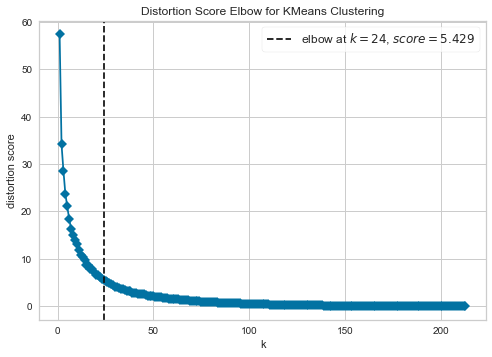

In [17]:
show_k_means_elbow_method(data)

With Elbow Method, we can see the elbow around k = 24.<br>
But notice that there are significant drop on distortion score for k = 2<br>
and moderate drop for k = 3, k = 4 , k = 5, k = 6. <br>
In my opinion, we can cluster into 2 or 3 big cluster or 5 medium cluster

<h4> Silhouette Score </h4>

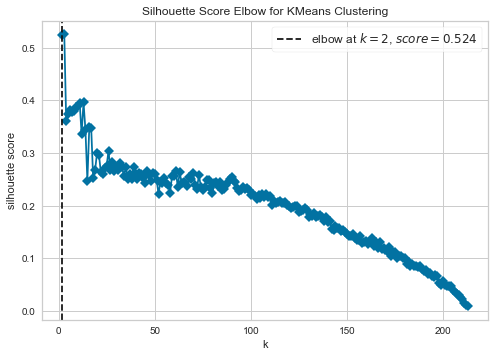

In [18]:
show_k_means_silhouette_score(data)

From the plot above, we can see higher silhouette score with k = 2 and k = 3 <br>
So we can cluster it into 2 or 3 cluster

<h3> Agglomerative Heirarchical Clustering </h3>

<h4> Single Linkage (Minimum) </h4>

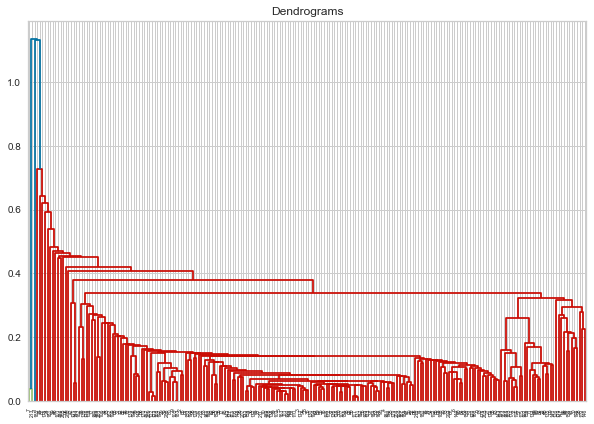

In [19]:
# Single Linkage (Minimum Distance)
show_ahc_single_dendogram(data)

With minimum linkage we can have 2 cluster

<h4> Complete Linkage (Maximum) </h4>

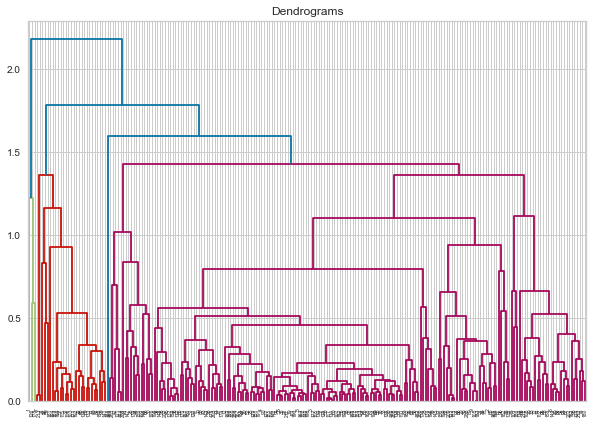

In [20]:
# Complete Linkage (Maximum Distance)
show_ahc_complete_dendogram(data)

With maximum linkage we can have 3 cluster

<h4> Average Linkage </h4>

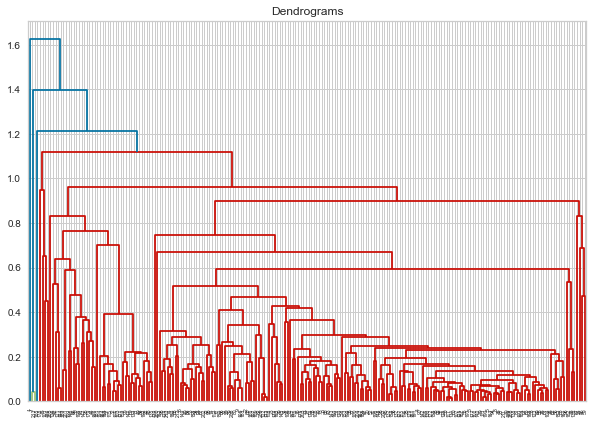

In [21]:
# Average Linkage (Average Distance)
show_ahc_average_dendogram(data)

With maximum linkage we can have 2 cluster

<h4> Centroid Linkage </h4>

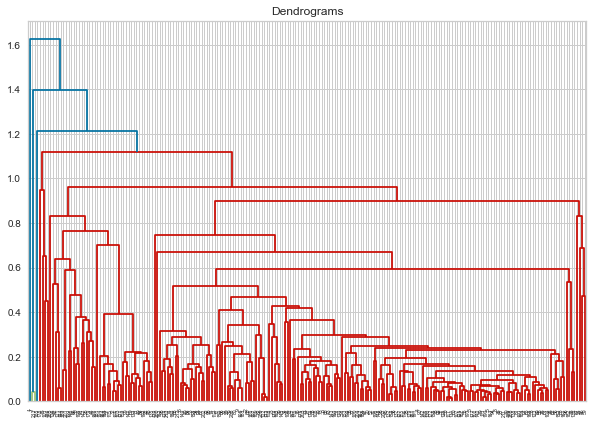

In [22]:
# Centroid Linkage (Centroid Distance)
show_ahc_average_dendogram(data)

With maximum linkage we can have 2 cluster

<h3> Conclusion </h3>
We can have 2 or 3 big cluster 